# Повышения выручки интернет магазина

# Часть 1. Приоритизация гипотез.

***Описание данных***

Файл /datasets/hypothesis.csv
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

**Ход исследования:**

Для начала работы получим данные из CSV-файла с гипотезами. Ознакомимся с данными и при необходимости подкорректируем. Приоритизируем гипотезы и составим градацию гипотез по приоритету с помощью метода приоритезации ICE, а затем выполним аналогичные действия с помощью метода приоритезации RICE, сравним полученные итоги и при наличии отличий дадим интерпритацию возможной причины.

Таким образом, моё исследование певрой части проекта пройдёт в 3 этапа:

- Загрузка и подготовка данных к анализу.
- Приоритезация гипотез и составление градации гипотез по приоритету ICE и RICE.
- Сравнение этих 2-х результатов между собой и интепритация  причины отличий приоритетов.

### Загружаем данные и готовим их к анализу

Импортируем необходимые библиотеки

In [2]:
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

import datetime as dt

import numpy as np

import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters

import scipy.stats as stats

Записываем данные в переменную для дальшейшей работы

In [3]:
try:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv', sep=',')
except:
    hypothesis = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')

# P.S Можно не указывать необязательный параметр разделителя в CSV если sep=',' !

Знакомимся с нашими данными

In [3]:
display(hypothesis)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


Видим 9 гипотез, каждая из которых имеет краткое описание, охват пользователей, влияние, уверенность в гипотезе, затраты на проведение. Все количественные атрибуты представлены в 10-и балльной шкале, что облегчает восприятие и даёт возможность использование методов приоритезации ICE и RICE(это одни из самых популярных способов приоритизации задач). Для соблюдения хорошего тона приведём название столбцов к единому стилю.

In [4]:
# Функция для приведения названий атрибутов к единому стилю
def snake_style(df):
    df.columns = df.columns.str.lower().str.replace(' ', '_')

In [5]:
snake_style(hypothesis)

In [6]:
display(hypothesis, pd.options.display.max_colwidth == 200)

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


False

Этап загрузки и ознакомления с данными исчерпан: у нас появилось понятное представление о данных и чёткая структура с которой мы продолжим работать.

### Приоритезация гипотез и составление градации гипотез по приоритету  ICE и RICE.

**Интерпритация и разъяснение этапа:**

Гипотезы приоритизируют, чтобы сократить расходы на эксперименты и запускать тестирование только наиболее перспективных идей. Нужно понимать, что на этапе генерации идей не существует критерия "плохая" и "хорошая" идея, существует только цель достижения максимального количества более менее адекватных и в теории реализуемых идей, которые уже потом будут оценены(в нашем случае с помощью ICE и RICE, можно ещё допустим с помощью метода WSJF или Матрицы Эйзенхауэра).

Проверка гипотез чаще всего стоит дорого, а ресурсов не хватает. Придётся выбрать, что будем тестировать, а чему скажем «нет». Чтобы максимизировать ожидаемое улучшение ключевых метрик бизнеса, сформулированные гипотезы приоритизируют.

**ICE и RICE
ICE (от англ. impact, confidence, effort / ease «влияние, уверенность, усилия / простота») — один из самых популярных способов приоритизации задач:**

Фреймворк RICE состоит из четырёх компонент:
- Reach — скольких пользователей затронет изменение, которое вы хотите внести;
- Impact — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;
- Confidence — насколько вы уверены, что это изменение повлияет на пользователей именно так; 
- Efforts — сколько стоит протестировать эту гипотезу. 

Проведём приоритезацию по 2-м этим методам (с формулами можно ознакомиться в коде):

- Приоритезации по методу ICE:

In [7]:
# Приоритезации по методу ICE
hypothesis['ICE'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
display(hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False).style.background_gradient('coolwarm'))

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


Добавим график приоритезации гипотез по ICE:

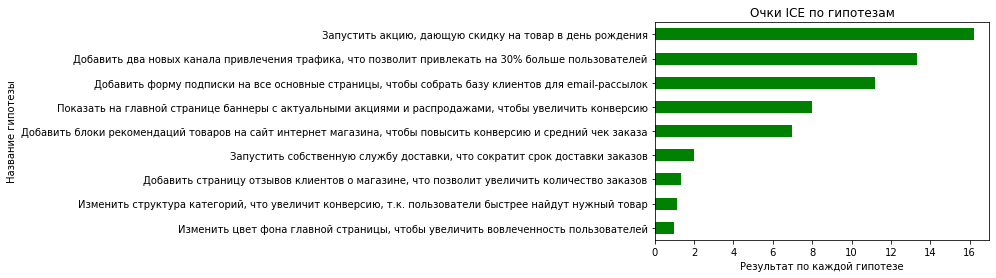

In [8]:
# Построение перевёрнутой столбчатой диаграммы
hypothesis.sort_values(by='ICE', ascending=True).set_index('hypothesis')['ICE'].plot(kind='barh', color='green')
plt.xlabel('Результат по каждой гипотезе')
plt.ylabel('Название гипотезы')
plt.title('Очки ICE по гипотезам')
plt.show()

Теперь нам более наглядно представлена степень разлчия гипотез по методу приоритезации ICE. 

- Приоритезации по методу RICE:

In [9]:
# Приоритезации по методу RICE
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
display(hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False).style.background_gradient('coolwarm'))

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.000000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.000000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.000000
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.000000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.000000


Добавим график приоритезации гипотез по RICE:

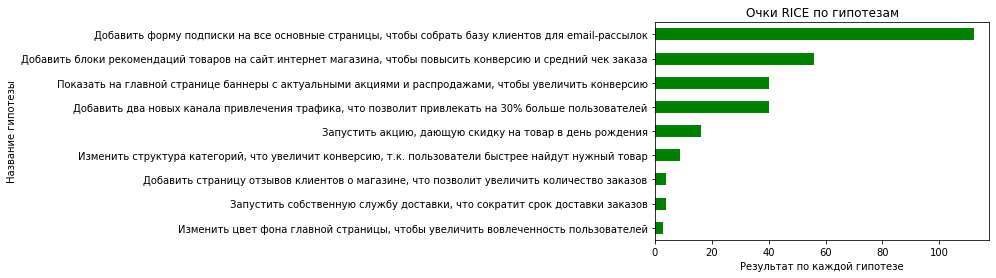

In [10]:
# Построение перевёрнутой столбчатой диаграммы
hypothesis.sort_values(by='RICE', ascending=True).set_index('hypothesis')['RICE'].plot(kind='barh', color='green')
plt.xlabel('Результат по каждой гипотезе')
plt.ylabel('Название гипотезы')
plt.title('Очки RICE по гипотезам')
plt.show()

Имеем визульное представление метода приоритезации гипотез по RICE методу: из графика легко увидеть что допустим гипотеза с добавлением формы записи на все основные страницы лидирует и имеет результат по методу минимум в 2 раза выше, чем у остальных исследуемых гипотез.

Построим перевёрнутую столбчатую диаграмму с результатами двух методов приоритезации для полного и наглядного понимания ситуации:

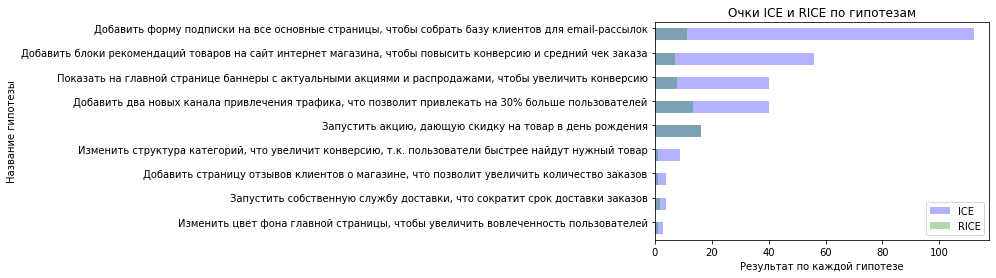

In [11]:
# Построение графика
fig, ax = plt.subplots()
hypothesis = hypothesis.sort_values(by='RICE').set_index('hypothesis')

# Построение столбцов для RICE
hypothesis['RICE'].plot(kind='barh', color='blue', ax=ax, position=1, legend=True, alpha=0.3)

# Построение столбцов для ICE
hypothesis['ICE'].plot(kind='barh', color='green', ax=ax, position=1, legend=True, alpha=0.3)

# Настройка графика
plt.xlabel('Результат по каждой гипотезе')
plt.ylabel('Название гипотезы')
plt.title('Очки ICE и RICE по гипотезам')
plt.legend(['ICE', 'RICE'])
plt.show()

С помощью данного графика мы можем оценить пригодность гипотезы наглядно сразу по 2-м методам приоритезации и более эффективно выбрать гипотезы.

Приоритет для каждой из гипотез выявлен: у нас получились результаты приоритезации гипотез по 2-м методам: ICE и RICE.

Результаты отличны друг от друга. Различия обусловлены тем, что метод RICE является форкой(ответвлением) метода ICE и их различия состоит в том, что RICE ко всему прочему учитывает ещё и охват пользователей. Таким образом, если нам важно ещё учесть охват пользователей, то стоит довериться приоритезации по RICE, хотя она и подразумевает большие временные затраты.

# Часть 2. Анализ A/B-теста

***Описание данных***

Файл /datasets/orders.csv:

- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.


Файл /datasets/visitors.csv:
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

**Ход исследования:**

Для начала работы получим данные из CSV-файлов. Ознакомимся с данными и при необходимости подкорректируем, затем проанализируем А/Б - тест. 

A/B-тест (2-ая часть проекта) пройдёт в 14 этапов, которые подразумевают следующие задачи:

- Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
- Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
- Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
- Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.
- Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.
- Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
- Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
- Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
- Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
- Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
- Примите решение по результатам теста и объясните его. Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

## Загрузка и ознакомление с данными:

In [12]:
try:
    orders = pd.read_csv('/datasets/orders.csv', sep=',')
except:
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')

# P.S Можно не указывать необязательный параметр разделителя в CSV если sep=',' !

In [13]:
try:
    visitors = pd.read_csv('/datasets/visitors.csv', sep=',')
except:
    visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')

# P.S Можно не указывать необязательный параметр разделителя в CSV если sep=',' !

Используем функцию которая покажет нам информацию о датафреймах для ознакомления:

In [14]:
def duplicated_sum(dataframes, names):
    for frame, name in zip(dataframes, names):
        duplicated_count = frame.duplicated().sum()
        print(f'\033[1m' + 'Количество дубликатов в таблице ' + name + ':' + '\033[0m', duplicated_count)
        temp = frame.copy()
        list_c = list(temp.columns)
        for col_l in list_c:
            print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
                  ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%')
            print('-'* 25)
        display(frame.info())
        display(frame.head(5))
        print()
duplicated_sum([orders, visitors], ['orders', 'visitors'])

Количество дубликатов в таблице orders: 0
transactionId : кол-во NaN 0 , процент NaN 0.0 %
-------------------------
visitorId : кол-во NaN 0 , процент NaN 0.0 %
-------------------------
date : кол-во NaN 0 , процент NaN 0.0 %
-------------------------
revenue : кол-во NaN 0 , процент NaN 0.0 %
-------------------------
group : кол-во NaN 0 , процент NaN 0.0 %
-------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B



Количество дубликатов в таблице visitors: 0
date : кол-во NaN 0 , процент NaN 0.0 %
-------------------------
group : кол-во NaN 0 , процент NaN 0.0 %
-------------------------
visitors : кол-во NaN 0 , процент NaN 0.0 %
-------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


У нас есть 2 датафрейма: 'orders' и  'visitors'. Пропуски в данных датафреймах отсутствуют, типы данных корректны, требование собледения единого стиля выполнено, объёмы строк не велики, вероятно что данные подготовлены к работе. На всякий случай проверим наличие явных дубликатов и обозначим временной диапозон. 

In [15]:
visitors = visitors.drop_duplicates()
orders = orders.drop_duplicates()

In [16]:
print(f'{len(orders)} - объём датафрейма "orders" после попытки удалить явные дубликаты')
print(f'{len(visitors)} - объём датафрейма "visitors" после попытки удалить явные дубликаты')

1197 - объём датафрейма "orders" после попытки удалить явные дубликаты
62 - объём датафрейма "visitors" после попытки удалить явные дубликаты


Явных дубликатов также нет, необходимость в проверке на наличие не явных дубликатов отсутствует.

Узнаем временной диапозон проведения А/Б теста:

In [17]:
def date_range(col):
    print(f'Временной диапозон исследуемого датафрейма: {col.min()} - {col.max()}')

In [18]:
date_range(visitors['date'])

Временной диапозон исследуемого датафрейма: 2019-08-01 - 2019-08-31


Проверим корректность разбиения пользователей на группы - может быть есть пользователи, попавшие в обе группы?

In [19]:
# Сгруппипуем данные по пользователям и найдём количество уникальных значений в атрибубе 'group'

# Группировка данных по пользователям и подсчет уникальных значений в 'group'
unique_groups = orders.groupby('visitorId')['group'].agg('nunique')

# Фильтрация записей, где количество уникальных значений больше одного
problem_visitors = unique_groups.loc[unique_groups > 1]

print(f'{len(problem_visitors)} - число проблемных пользователей, которые попали сразу в 2 группы исследования')

58 - число проблемных пользователей, которые попали сразу в 2 группы исследования


У нас появилась проблема: есть 58 пользователей которые попали сразу в обе группы. Какие есть пути решения данной проблемы:
- удалить проблемных пользователей из исследования
- установим первоначальное определение в группу проблемного пользователя для последующих покупок

Уберём проблемных пользователей из исследования:

In [20]:
orders = orders.loc[~orders['visitorId'].isin(problem_visitors.index)]
print(orders)

      transactionId   visitorId        date  revenue group
0        3667963787  3312258926  2019-08-15     1650     B
1        2804400009  3642806036  2019-08-15      730     B
3        3797467345  1196621759  2019-08-15     9759     B
4        2282983706  2322279887  2019-08-15     2308     B
5         182168103   935554773  2019-08-15     2210     B
...             ...         ...         ...      ...   ...
1191     3592955527   608641596  2019-08-14    16490     B
1192     2662137336  3733762160  2019-08-14     6490     B
1193     2203539145   370388673  2019-08-14     3190     A
1194     1807773912   573423106  2019-08-14    10550     A
1196     3936777065  2108080724  2019-08-15   202740     B

[1016 rows x 5 columns]


Результируем: данные полностью готовы для дальнейшей работы, датафрейм 'visitors' хранит данные о объёме посещений по датам и группам исследования, датафрейм 'orders' хранит данные о объёме продаж также по датам и группам, время проведения А/Б теста - 1 месяц(август 2019 года), решение проблемы с пользователями которые попали сразу в 2 группы найдено и реализовано.

## Приступим к анализу А/Б теста(включает в себя 14 этапов):

**1) Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.**

In [21]:
# 1. Создадим датафрейм datesGroups с уникальными парами значений 'date' и 'group', таблицы orders. Избавимся от дубликатов методом drop_duplicates().
datesGroups = orders[['date', 'group']].drop_duplicates().sort_values(by='date')

# 2. Объявите переменную ordersAggregated с агрегированными данными
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'visitorId' : pd.Series.nunique,
'transactionId' : pd.Series.nunique,
'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# 3. Объявляем переменную visitorsAggregated, подсчитывая количество уникальных посетителей кумулятивно
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[(visitors['date'] <= x['date']) & (visitors['group'] == x['group'])].agg({
        'date': 'max',
        'group': 'max',
        'visitors': 'sum'
    }), axis=1).sort_values(by=['date', 'group']).sort_values(by=['date','group'])

# 5. Объединяем агрегированные данные
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])

# 6. Переименовываем столбцы
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

# 7. Выводим первые 5 строк
print(cumulativeData.head(5))

         date group  orders  buyers  revenue  visitors
0  2019-08-01     A      19      23   142779       719
1  2019-08-01     B      17      17    59758       713
2  2019-08-02     A      36      42   234381      1338
3  2019-08-02     B      39      40   221801      1294
4  2019-08-03     A      60      66   346854      1845


In [22]:
cumulativeData['date'] = pd.to_datetime(cumulativeData['date'])

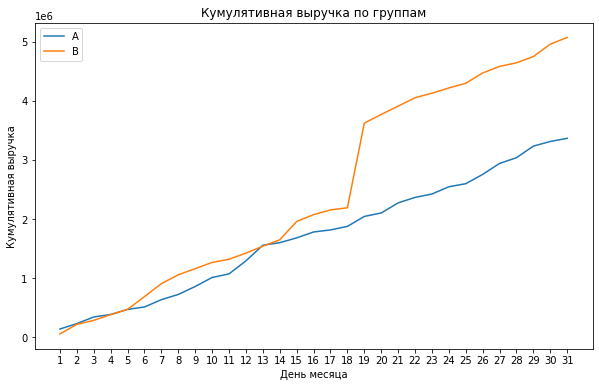

In [23]:
plt.figure(figsize=(10, 6))
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

# Извлекаем дни из столбца 'date'
days = cumulativeRevenueA['date'].dt.strftime('%d').astype(int)

# Устанавливаем метки для оси X
plt.xticks(cumulativeRevenueA['date'], days)

plt.title('Кумулятивная выручка по группам')
plt.xlabel('День месяца')
plt.ylabel('Кумулятивная выручка')
plt.legend() 
plt.show()

  Можно заметить на графике, что кумулятивная выручка по группам накапливалась схожими темпами и даже на 13-ое августа сравнялась между группами, т.е. примерно половину времени от всего А/Б теста исследование шло адекватными темпами, ведь предварительно группы старались сформировать максимально схожими (с помощью А/А теста) и соответсвенно поведение этих групп от изменения или внедрения какой-то всего одной фичи координально сильно поменяться было не должно, что заставляет нас насторожиться.
  
  Явная проблема появилась после 18-го авгуса: прослеживается уж очень сильная дифференциация в накопительной выручке после этой даты в сторону группы Б, что заставляет задуматься: очень маловероятно что нововведение так сильно подымает выручку. 
  
  Соответсвенно, что с большой вероятностью появились факторы искажающие результаты наблюдений: они могут быть различны, но в нашем случае первоочерёдно следует устранить аномально большие покупки и после данного действия снова взглянуть на дианмику накопительной выручки групп (эта одна из наиболее вероятных проблем), если проблема не исчезнет, то необходимо дальше осуществить попытку поиска искажающего фактора.

**2) Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения:**

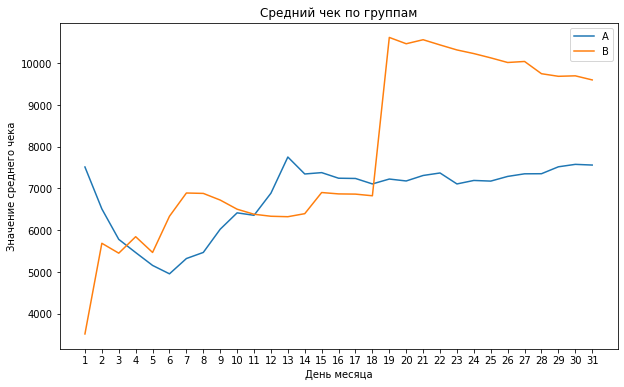

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
# Устанавливаем метки для оси X
plt.xticks(cumulativeRevenueA['date'], days)
plt.title('Средний чек по группам')
plt.xlabel('День месяца')
plt.ylabel('Значение среднего чека')
plt.legend()
plt.show()

На графике видим, что значения среднего чека групп на протяжении всего исследования колеблются, но  после 18-го августа средний чек группы Б невероятно сильно вырос, снова видим проблему от 18-го числа: темпы роста кумулятивной выручки после 19-го числа в обоих группах оказываются примерно одинаковыми и динамика среднего чека после 19-го тоже приходит в адекватное состояние: вероятно аномально большие покупки в группе Б были совершены в 18-19-х числах августа.  

**3)Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.**

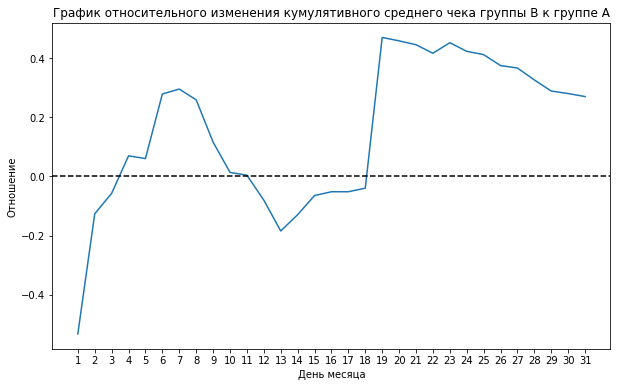

In [25]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(10, 6))
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

plt.xticks(cumulativeRevenueA['date'], days)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('День месяца')
plt.ylabel('Отношение')

plt.show()

Результаты теста значительно и резко менялись в несколько дат. Видимо, именно тогда были совершены аномальные заказы.

**4) Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.**

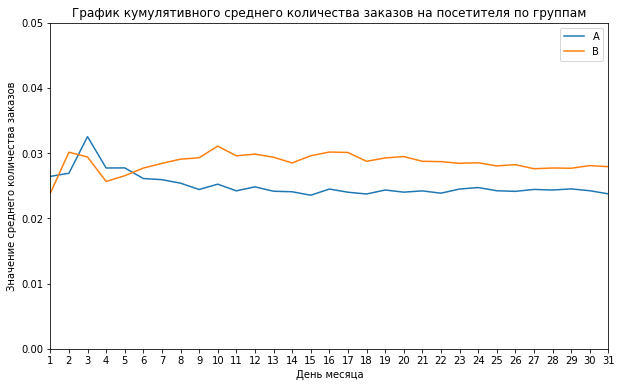

In [26]:

# считаем среднее количество заказов на посетителя
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(10, 6))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.xticks(cumulativeRevenueA['date'], days)
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('День месяца')
plt.ylabel('Значение среднего количества заказов')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), 0, 0.05])
plt.show()

Изначально кумулятивное среднее количество заказов на посетителя в группах приблизительно схоже, после 6-го числа можно заметить что группа Б начала перегонять группу А по данному показателю и под конец месяца зафиксировало постоянство превосходтсва.

**5) Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.**

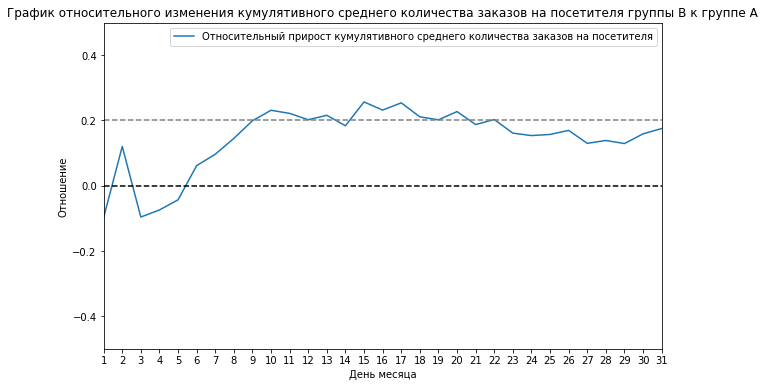

In [27]:
# Объединение данных
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(
    cumulativeDataB[['date','conversion']], 
    left_on='date', 
    right_on='date', 
    how='left', 
    suffixes=['A', 'B']
)

# Преобразование дат
mergedCumulativeConversions['date'] = pd.to_datetime(mergedCumulativeConversions['date'])

# Построение графика
plt.figure(figsize=(10, 6))

plt.plot(mergedCumulativeConversions['date'], 
         mergedCumulativeConversions['conversionB'] / mergedCumulativeConversions['conversionA'] - 1, 
         label="Относительный прирост кумулятивного среднего количества заказов на посетителя")
plt.legend()

# Добавление горизонтальных линий
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')

# Обновление осей
plt.gca().set_xlim(pd.Timestamp('2019-08-01'), pd.Timestamp('2019-08-31'))
plt.gca().set_ylim(-0.5, 0.5)

# Отображение графика

plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.ylabel('Отношение')
plt.xlabel('День месяца')
plt.xticks(cumulativeRevenueA['date'], days)
plt.show()

Мы построили график относительного различия метрики между группами.
Почти с самого начала теста группа B лидирует по метрике: становится лучше и лучше, либо зафиксировалась около прироста в 20 - 25% относительно группы A.

**6) Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.**

         userId  orders
908  3967698036       3
55    249864742       3
478  2108163459       3
687  2988190573       3
890  3908431265       3
138   611059232       3
632  2742574263       3
157   678354126       2
323  1404560065       2
452  1985475298       2


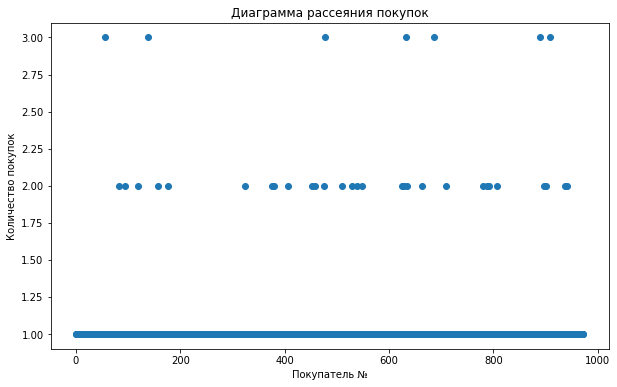

In [28]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['userId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

x_values = pd.Series(range(0,len(ordersByUsers)))

plt.figure(figsize=(10, 6))

plt.scatter(x_values, ordersByUsers['orders'])
x_values = pd.Series(range(0, len(ordersByUsers)))

plt.title('Диаграмма рассеяния покупок')
plt.ylabel('Количество покупок')
plt.xlabel('Покупатель №')

plt.show()

Пользователей, заказавших более двух раз, совсем мало. Они вполне могут быть аномальными. 
2 заказа — нормально или много? Ответим на этот вопрос, посчитав выборочные перцентили.

**7) Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.**

In [29]:
print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

print(np.percentile(ordersByUsers['orders'], [95, 99])) 

         userId  orders
908  3967698036       3
55    249864742       3
478  2108163459       3
687  2988190573       3
890  3908431265       3
138   611059232       3
632  2742574263       3
157   678354126       2
323  1404560065       2
452  1985475298       2
[1. 2.]


Не более 1% пользователей совершали больше двух заказов. За выбросы будем считать клиентов которые совершили больше 2 и более покупок, исключим наиболее радикальные значения количества покупок на пользователя: наиболее оптимальный путь разрешения.  

**8) Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.**

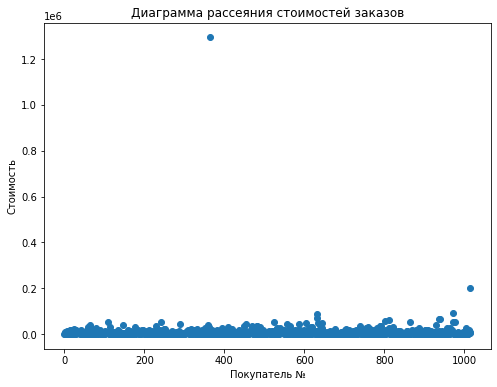

In [30]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(8, 6))
plt.scatter(x_values, orders['revenue'])

plt.title('Диаграмма рассеяния стоимостей заказов')
plt.ylabel('Стоимость')
plt.xlabel('Покупатель №')

plt.show()

Заказов стоимостью более 170.000 практически нет(есть только 2 аномально дорогих заказов). Аномальными случаями являются покупки стоимостью  1294500 руб. и 202740 руб., они однозначно входят в 1% наиболее дорогостоящих, их стоит исключить их исследования, лучше подстраховаться и поискать ещё возможные выбросы с помощью перцентилей.

**9) Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.**

In [31]:
print(np.percentile(orders['revenue'], [95, 99]))

[26785. 53904.]


Теряем 5% данных и исключаем заказы которые дороже 26785 рублей: не более 5% клиентов совершали заказ на сумму больше 26785 рублей, не больше 1% клиентов совершали заказы на сумму более 53904 рублей.

**10) Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.**

Сформулируем гипотезы:
- H0: различий в среднем количестве заказов на посетителя между группами по «сырым» данным отсутствуют
- H1: различий в среднем количестве заказов на посетителя между группами по «сырым» данным присутствуют

In [32]:
orders.columns = ['orderId', 'userId', 'date', 'revenue', 'group']
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'orderId', 'userId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'orderId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'orderId', 'userId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'orderId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

#print(data.head(5))

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
print('p-value:', end=' ')
print("{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))


print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value: 0.01102
0.160


P-value  меньше 0.05, потому нулевую гипотезу отвергаем. Анализ «сырых данных» сообщает, что в среднем количестве заказов между группами есть статистически значимые различия. Относительный прирост среднего группы B к конверсии группы A равен 13.8%.
Осталось сравнить средние чеки по «сырым данным», а затем обе метрики ещё раз после удаления выбросов.

**11) Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.**

Сформулируем гипотезы:
- H0: различий в средних чеках отсутствуют
- H1: различий в средних чеках присутствуют

In [33]:
print('p-value:', end=' ')
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value: 0.829
0.287


P-value больше 0.05 — статистически значимых отличий в среднем чеке между группами нет: принимаем нулевую гипотезу об отсутствии отличий. Относительное различие среднего чека между сегментами  25.9% не является статистически значимым.

**12) Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.**

In [34]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 1]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 1]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 26785]['userId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
#len(abnormalUsers)
# 74 - аномальных клиента

sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
print('p-value:', end=' ')
print('{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value: 0.01593
0.174


P-value меньше 0.05, потому нулевую гипотезу отвергаем. Анализ «очищенных данных» сообщает, что в среднем количестве заказов между группами есть статистически значимые различия. Относительный прирост среднего группы B к конверсии группы A равен 17.3%. Сегмент B значительно лучше сегмента A.

**13) Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.**

In [35]:
print('p-value:', end=' ')
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['userId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['userId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['userId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['userId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value: 0.727
-0.034


P-value больше 0.05 — статистически значимых отличий в среднем чеке между группами нет: принимаем нулевую гипотезу об отсутствии отличий. Относительное различие среднего чека между сегментами после "очистки" данных не являются статистически значимыми.

**14) Примите решение по результатам теста и объясните его. Варианты решений:**
- Остановить тест, зафиксировать победу одной из групп.
- Остановить тест, зафиксировать отсутствие различий между группами.
- Продолжить тест.

Относительный прирост среднего количества заказов группы B к среднему количеству группы A равен 17.3%. Сегмент B значительно лучше сегмента A по среднему количеству заказов, а гипотеза об отсутствии различий в средних чеках групп не была отвергнута. Результируем: пользователи группы Б в среднем больше совершают заказы относительно группы А, средние чеки у этих двух групп примерно идентичны, времени с начала А/Б теста прошло достаточно чтобы его закончить, а значит мы останавливаем тест и фиксируем победу группы Б: она показала себя более пригодной с точки зрения бизнеса. При глобальном обновлении интернет магазина по пути Б группы ожидается прирост среднего количества заказов и сохранение текущего среднего чека.